In [1]:
import pandas as pd

import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
path = './'
df = pd.read_csv(path + "telco_2yr.csv")

In [3]:
df.shape

(1695, 4)

In [4]:
df = df.convert_objects(convert_numeric=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
df.dtypes #customer_id is a string

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [6]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


In [7]:
#What is the inner quartile range of tenure? monthly charges? total charges?
# df.describe()
df.describe().quantile(.75)-df.describe().quantile(.25)

tenure               30.697659
monthly_charges      65.509601
total_charges      2713.212960
dtype: float64

In [8]:
df.describe()

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1685.000000
mean,56.735103,60.770413,3728.933947
std,18.209363,34.678865,2571.252806
min,0.000000,18.400000,20.350000
25%,48.000000,24.025000,1278.800000
50%,64.000000,64.350000,3623.950000
75%,71.000000,90.450000,5999.850000
max,72.000000,118.750000,8672.450000


In [9]:
df = df.fillna(0) #10 rows were missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


(array([644.,  75., 186., 270., 235., 285.]),
 array([ 18.4  ,  35.125,  51.85 ,  68.575,  85.3  , 102.025, 118.75 ]),
 <a list of 6 Patch objects>)

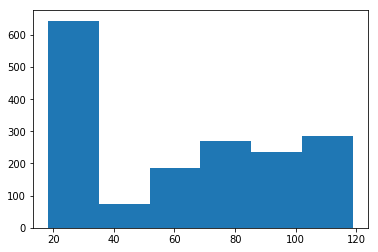

In [10]:
plt.hist(df.monthly_charges, bins=6)

In [11]:
#Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.
df2 = df[['tenure', 'monthly_charges', 'total_charges']]
df2

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75
5,72,101.30,7261.25
6,56,45.05,2560.10
7,71,95.75,6849.40
8,54,20.40,1090.60
9,69,19.70,1396.90


## create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

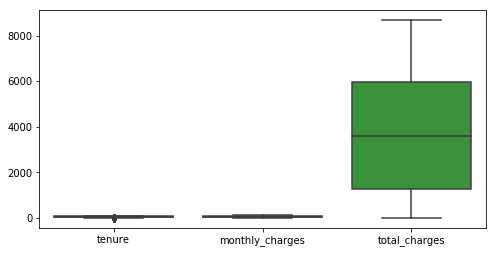

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2)

## Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [13]:
X = df[['monthly_charges', 'tenure']] #make sure to use capital X
y = df[['total_charges']] #y is dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1) #axis = columns
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Create a scatterplot for each combination of variables.

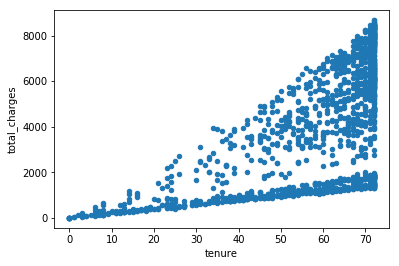

In [14]:
train.plot.scatter(x='tenure', y='total_charges')

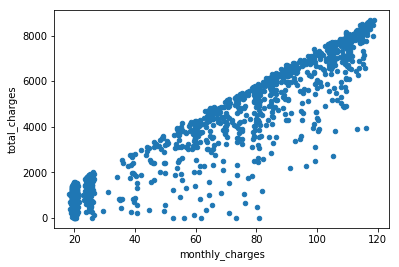

In [15]:
train.plot.scatter(x='monthly_charges', y='total_charges')

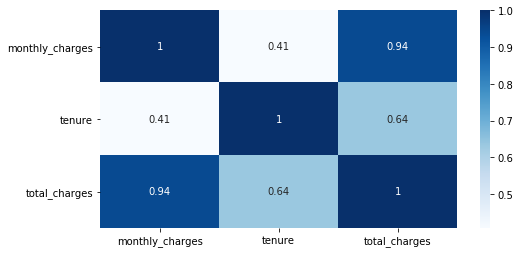

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [17]:
pearson_r = [[column, pearsonr(train[column], train.total_charges)] for column in X_train]
pearson_r

[['monthly_charges', (0.9417149491320433, 0.0)],
 ['tenure', (0.6350021065102249, 5.692136817600413e-154)]]

In [18]:
monthly_pearson = pearson_r[0][1][0]
monthly_pearson = '{:.2}'.format(monthly_pearson)

In [19]:
tenure_pearson = pearson_r[1][1][0]
tenure_pearson = '{:.2}'.format(tenure_pearson)

In [20]:
monthly_pval = pearson_r[0][1][1]
monthly_pval = '{:.2}'.format(monthly_pval)

In [21]:
tenure_pval = pearson_r[1][1][1]
tenure_pval ='{:.2e}'.format(tenure_pval)

In [22]:
print("Pearson's R is " + monthly_pearson + " with a significance p-value of " + monthly_pval)

Pearson's R is 0.94 with a significance p-value of 0.0


In [23]:
print("Pearson's R is " + tenure_pearson + " with a significance p-value of " + tenure_pval)

Pearson's R is 0.64 with a significance p-value of 5.69e-154


## Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [24]:
telco_lm = LinearRegression(fit_intercept=False) #set y-int to 0
print(telco_lm)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [25]:
telco_lm.fit(X_train[['tenure']], y_train)
print(telco_lm)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [26]:
#parameters
telco_y_intercept = telco_lm.intercept_
print(telco_y_intercept)

telco_coefficients = telco_lm.coef_
print(telco_coefficients)

0.0
[[67.81557644]]


## What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.

The y-intercept, in this case $0, is the total charge when tenure is 0 months.

## What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.

The slope is 67.8, the tenure coefficient. It represents change in total charges over change in tenure. As tenure increases, the total charges increase by 67.8. 

## Write the linear function in the form of y=mx+b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

total charges = 67.8(tenure) + 0 

## Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [27]:
y_pred_telco = telco_lm.predict(X_train.drop(columns=['monthly_charges']))
print(y_pred_telco)

[[4475.82804516]
 [4814.90592737]
 [4068.93458651]
 ...
 [4747.09035093]
 [4814.90592737]
 [2712.62305767]]


## Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [28]:
mse_telco = mean_squared_error(y_train, y_pred_telco)
print("telco_lm\n  mse: {:.3}".format(mse_telco)) 

telco_lm
  mse: 4.21e+06


In [29]:
r2_telco = r2_score(y_train, y_pred_telco)
print('R squared value for telco_lm: {:.2%}'.format(r2_telco))

R squared value for telco_lm: 37.46%


In [30]:
mae_telco = median_absolute_error(y_train, y_pred_telco)
print('Median absolute error is: {:.3}'.format(mae_telco))

Median absolute error is: 1.73e+03


## Test your model on the test sample.

In [31]:
y_pred_telco2 = telco_lm.predict(X_test[['tenure']])

## Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [32]:
mse = mean_squared_error(y_test, y_pred_telco2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3881232.75


In [33]:
r2 = r2_score(y_test, y_pred_telco2)

print('{:.2%} of the variance in total charges can be explained by tenure.'
      .format(r2))

38.34% of the variance in total charges can be explained by tenure.


In [34]:
mae = median_absolute_error(y_test, y_pred_telco2)
print('Median absolute error is: {:.3}'.format(mae))

Median absolute error is: 1.59e+03


## Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [35]:
from sklearn.feature_selection import f_regression

In [36]:
telco_freg_train = f_regression(X_train, y_train, center=True)
print(telco_freg_train)

(array([10609.98914396,   914.87196992]), array([0.00000000e+000, 5.69213682e-154]))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
telco_freg_test = f_regression(X_test, y_test, center=True)
print(telco_freg_test)

(array([2663.48364019,  231.6718391 ]), array([4.59644491e-162, 3.48651193e-040]))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Create a scatter plot of the predicted values versus the actual values in the test sample.

Text(0.5, 1.0, 'Predicted vs Actual Total Charges for test sample')

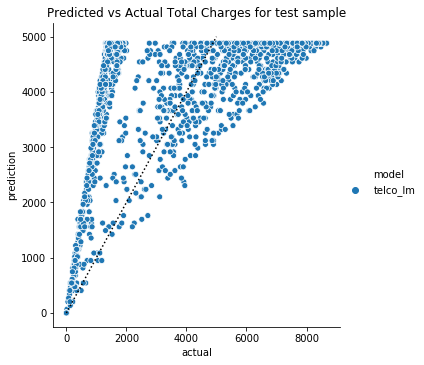

In [44]:
pd.DataFrame({'actual': y_train.total_charges,
              'telco_lm': y_pred_telco.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([0, 5000], [0, 5000], c='black', ls=':')
plt.title('Predicted vs Actual Total Charges for test sample')

## Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

Text(0.5, 1.0, 'Actual values in test sample')

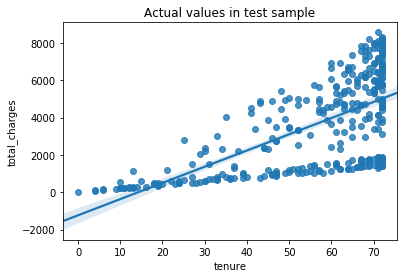

In [92]:
pd.DataFrame({'tenure': X_test.tenure,
              'total_charges': y_test.total_charges.ravel()})\
    .pipe((sns.regplot, 'data'), x='tenure', y='total_charges')
plt.title('Actual values in test sample')

## Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

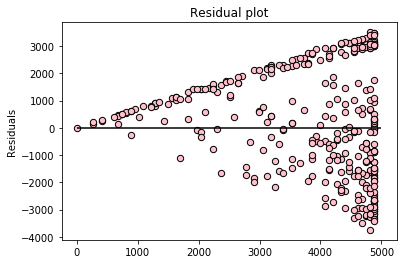

In [81]:
plt.scatter(y_pred_telco2, y_pred_telco2 - y_test, c='pink', s=40, edgecolors='black')
plt.hlines(y=0, xmin=0, xmax=5000)
plt.title("Residual plot")
plt.ylabel('Residuals')